In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import black_scholes_tf as bs_tf

from plotter import Plotter
from tf_graph_visualizer import *

In [4]:
random_seed = 1312

### Pricing Vanilla Call Option (Closed Formula + 2nd derivatives). TF Visualization

In [6]:
S, K, T, sigma, r = 100, 110, 2, 0.2, 0.03
result = bs_tf.Pricer.plain_vanilla_closed_formula_with_2nd_greeks()(S, K, T, sigma, r)
print(result)
show_graph()

[9.739834, [0.5066145, 56.411205, 81.843216, -0.37201464, 4.0482087], [0.014102802, 0.5310427, 2.8205605, -0.012820729, 0.06886054], [0.5310427, -1.2452297, -6.613867, 0.030063031, 13.941332], [2.8205605, -6.613866, 400.42563, -1.8201164, 46.597298], [-0.012820728, 0.030063028, -1.8201163, 0.011655207, -0.025798593], [0.06886053, 13.941331, 46.597298, -0.025798589, -0.62807804]]


### Pricing Vanilla Call Option (with path). TF Visualization

In [8]:
S, K, T, sigma, r, seed, n_sims, n_obs = 100, 110, 2, 0.2, 0.03, random_seed, 10000, 100
result = bs_tf.Pricer.plain_vanilla_with_path()(S, K, T, sigma, r, seed, n_sims, n_obs)
print(result)
show_graph()

[9.575454, [0.49852842, 55.357048, 80.55477, -0.36615863, -0.2872636]]


In [8]:
# Increase
S, K, T, sigma, r, seed, n_sims, n_obs = 100, 110, 2, 0.2, 0.03, random_seed, 100000, 100
result = bs_tf.Pricer.plain_vanilla_with_path()(S, K, T, sigma, r, seed, n_sims, n_obs)
print(result)

[9.737694, [0.5076241, 56.384834, 82.049416, -0.37295353, -0.2921308]]


### MCMC Random Path: Visualization

In [9]:
# Path 1
S, K, T, volatility, r, seed, n_sims, n_obs = 100, 110., 3, 0.2, 0.03, random_seed, 10, 50
path_simulator = bs_tf.Pricer.make_path_simulator()
paths_sample = path_simulator(S, K, T, volatility, r, seed, n_sims, n_obs)
df_melt = Plotter.dataframe_price_evolution(T, n_obs, paths_sample)

# Path 2
S, K, T, volatility, r, seed, n_sims, n_obs = 100, 110., 3, 0.2, 0.03, random_seed, 10, 100
path_simulator = bs_tf.Pricer.make_path_simulator()
paths_sample_2 = path_simulator(S, K, T, volatility, r, seed, n_sims, n_obs)
df_melt_2 = Plotter.dataframe_price_evolution(T, n_obs, paths_sample_2)

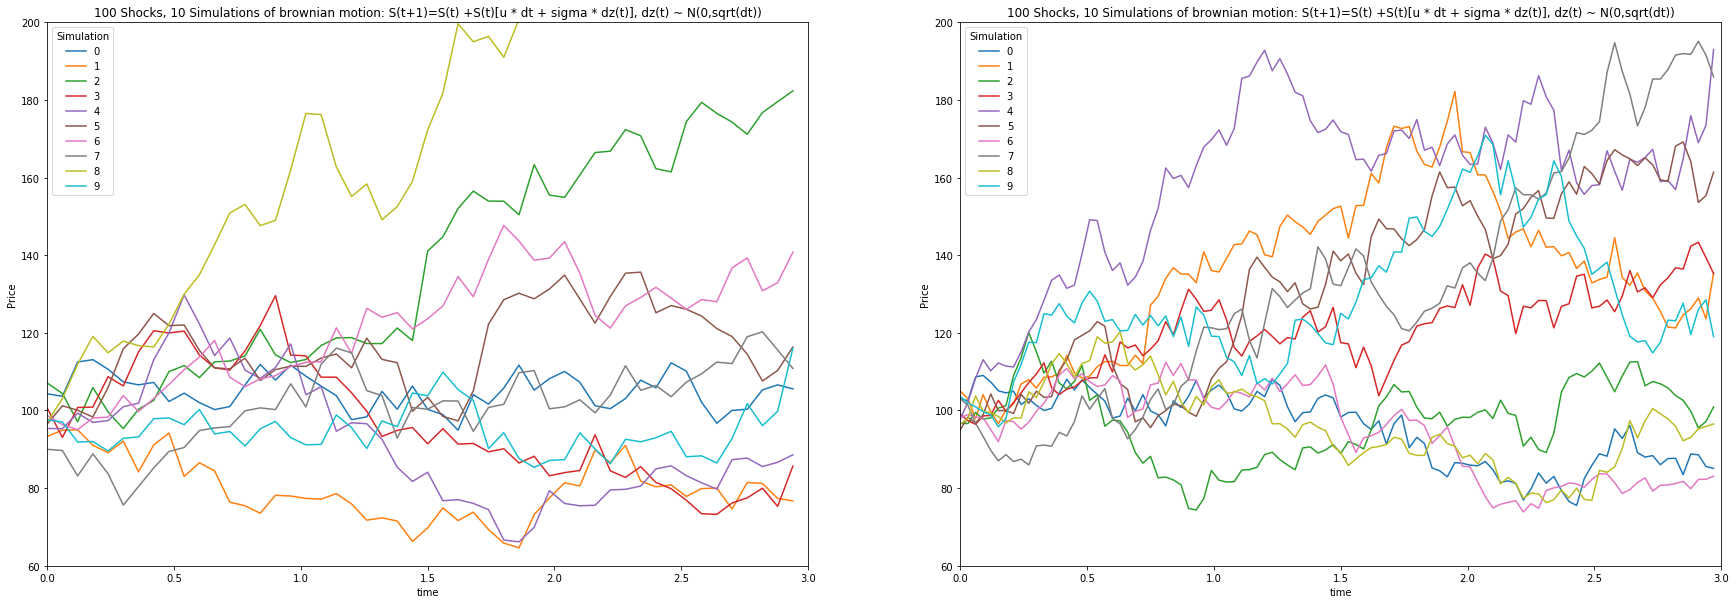

In [10]:
fig, ax = plt.subplots(figsize=(30, 10), ncols=2, nrows=1)
Plotter.make_plot(ax[0], df_melt, T)
Plotter.make_plot(ax[1], df_melt_2, T)

#### Bibliografia
##### 1) Blog Post: https://ipythonquant.wordpress.com/2018/05/22/tensorflow-meets-quantitative-finance-pricing-exotic-options-with-monte-carlo-simulations-in-tensorflow/
##### 2) Blog Post: https://ipythonquant.wordpress.com/ 
##### 3) Github Account: https://github.com/mgroncki